In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Read and display the image

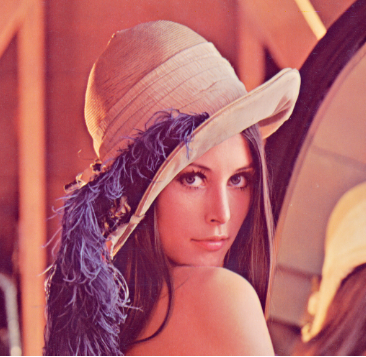

In [3]:
# Read the image using the Pillow library and display it.

!pip install pillow
from PIL import Image
image_colored = Image.open("/content/drive/MyDrive/Final_Year/lenna_image.png")
display(image_colored)

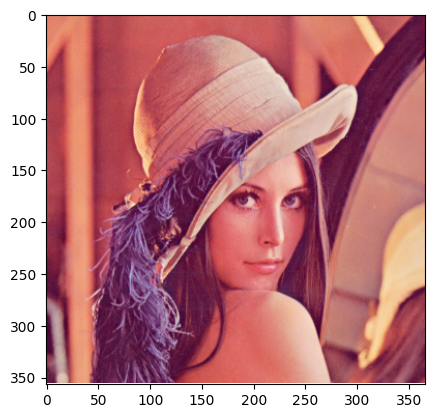

In [10]:
# You can also use matplotlib to display the image.
import matplotlib.pyplot as plt
plt.imshow(image_colored)
plt.show()

# 2. Display only the top left corner of 100x100 pixels.

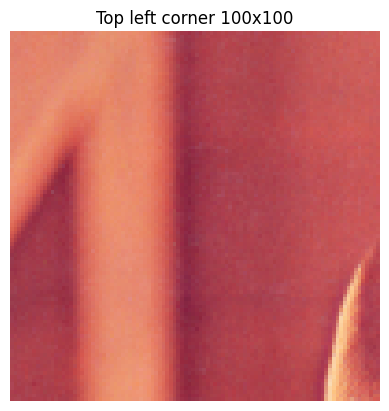

In [9]:
import numpy as np
image_array = np.array(image_colored)
top_left = image_array[:100, :100]  # Extract top-left 100x100 pixels
plt.imshow(top_left)
plt.title("Top left corner 100x100")
plt.axis("off")
plt.show()

# 3. Show the three color channels (R, G, B).

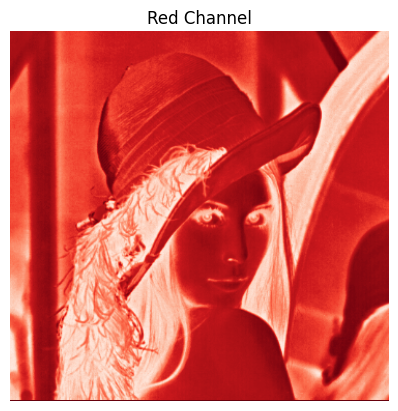

In [11]:
r = image_array[:, :, 0]
plt.imshow(r, cmap='Reds')
plt.title("Red Channel")
plt.axis("off")
plt.show()

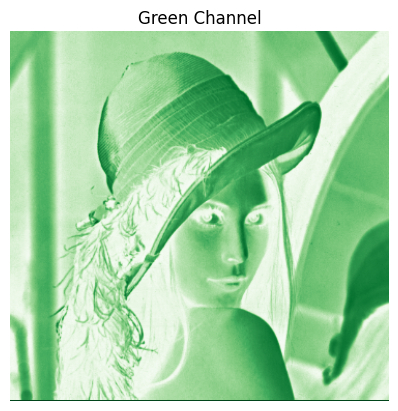

In [12]:
g = image_array[:, :, 1]
plt.imshow(g, cmap='Greens')
plt.title("Green Channel")
plt.axis("off")
plt.show()

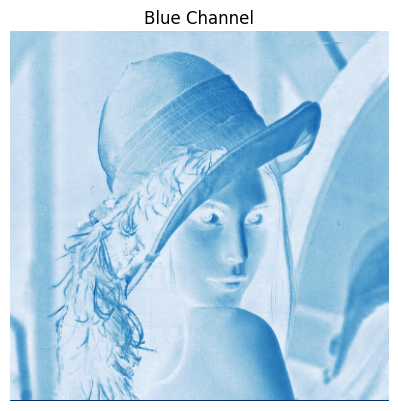

In [13]:
b = image_array[:, :, 2]
plt.imshow(b, cmap='Blues')
plt.title("Blue Channel")
plt.axis("off")
plt.show()


# 4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image

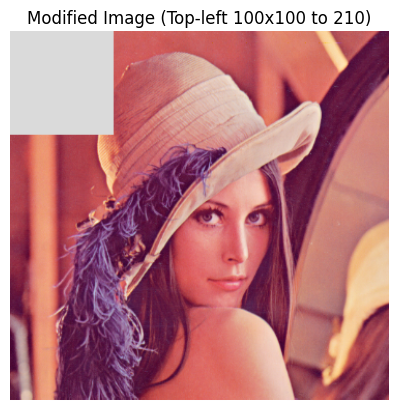

In [14]:
image_array[:100, :100] = 210
plt.imshow(image_array)
plt.title("Modified Image (Top-left 100x100 to 210)")
plt.axis("off")
plt.show()

# Exercise - 2:

# 1. Load and display a grayscale image.

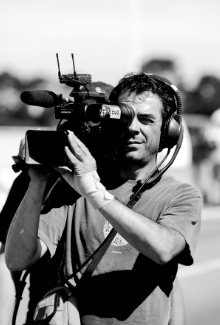

In [15]:
#Load a grayscale image using the Pillow library.
image_colored = Image.open("/content/drive/MyDrive/Final_Year/camera_man.jpg")
image_grayscale = image_colored.convert("L")
display(image_grayscale)

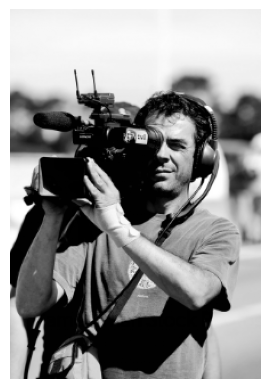

In [17]:
#Display the grayscale image using matplotlib.
image = Image.open("/content/drive/MyDrive/Final_Year/camera_man.jpg")
gray_image = image.convert("L")
plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.show()

# 2. Extract and display the middle section of the image (150 pixels).

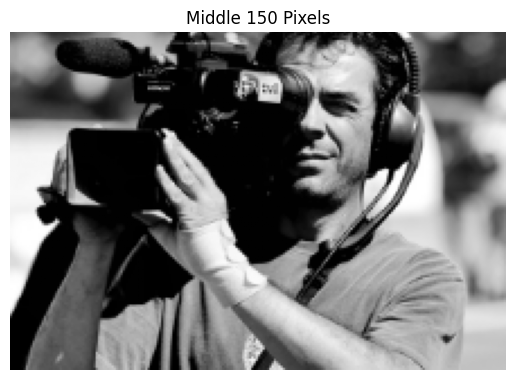

In [18]:
gray_array = np.array(gray_image)
h, w = gray_array.shape

# Crop middle 150 pixels in height
cropped = gray_array[h//2 - 75 : h//2 + 75, :]
plt.imshow(cropped, cmap="gray")
plt.title("Middle 150 Pixels")
plt.axis("off")
plt.show()

# 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

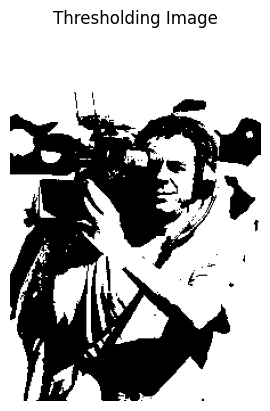

In [19]:
binary_image = np.where(gray_array < 100, 0, 255)
plt.imshow(binary_image, cmap="gray")
plt.title("Thresholding Image")
plt.axis("off")
plt.show()

# 4. Rotate the image 90 degrees clockwise and display the result.

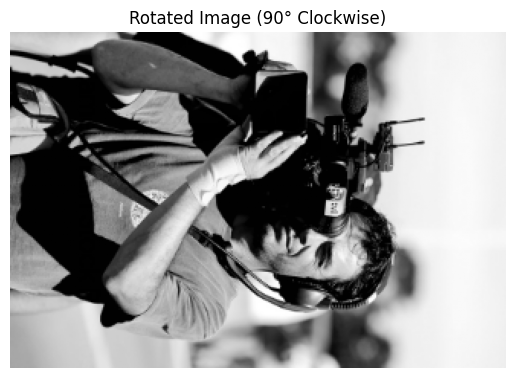

In [20]:
rotated = np.rot90(gray_array, k=-1)
plt.imshow(rotated, cmap="gray")
plt.title("Rotated Image (90° Clockwise)")
plt.axis("off")
plt.show()

# 5. Convert the grayscale image to an RGB image.

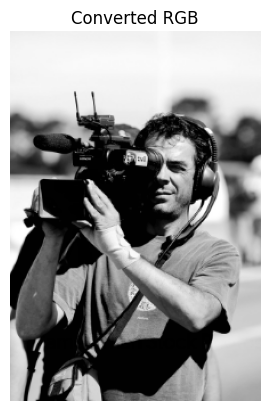

In [21]:
rgb_image = np.stack([gray_array]*3, axis=-1)  # Copy grayscale values to R, G, B channels
plt.imshow(rgb_image)
plt.title("Converted RGB")
plt.axis("off")
plt.show()

# Exercise 3: Image Compression and Decompression using PCA.

# 1. Load and preprocess image

In [22]:
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA

# 1. Load and preprocess image
image = Image.open("/content/drive/MyDrive/Final_Year/lenna_image.png")
gray_image = image.convert("L")  # Convert to grayscale
gray_array = np.array(gray_image)

# 2. Center the dataset (mean centering)
mean_centered = gray_array - np.mean(gray_array)

# 3. Compute covariance matrix
cov_matrix = np.cov(mean_centered.flatten())

print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 2347.708229134957


# 2. Compute covariance matrix and eigenvalues

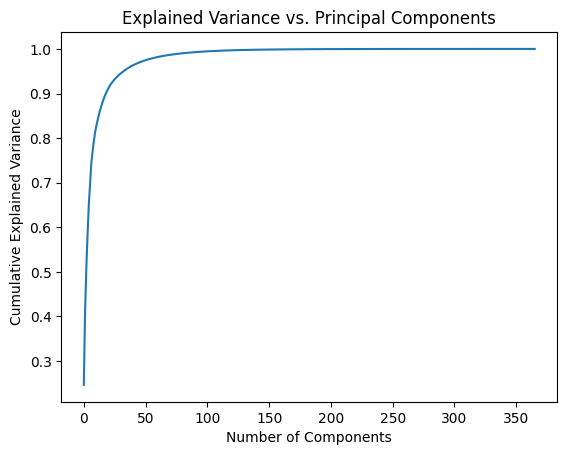

In [23]:
cov_matrix = np.cov(mean_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and select top k components
explained_variance = np.cumsum(eigenvalues[::-1]) / np.sum(eigenvalues)
k_values = [10, 30, 50, 100]  # Different levels of compression

plt.plot(explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Principal Components")
plt.show()

# 3. PCA Reconstruction

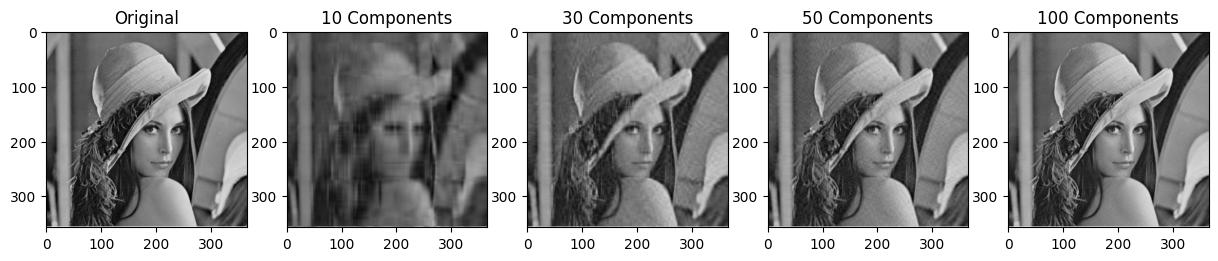

In [24]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(gray_array, cmap="gray")
axes[0].set_title("Original")

for i, k in enumerate(k_values):
    pca = PCA(n_components=k)
    transformed = pca.fit_transform(gray_array)
    reconstructed = pca.inverse_transform(transformed)
    axes[i+1].imshow(reconstructed, cmap="gray")
    axes[i+1].set_title(f"{k} Components")

plt.show()